### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Config. de print() para evitar saídas com o tipo de dado
np.set_printoptions(legacy='1.25')

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [34]:
lojas = [loja, loja2, loja3, loja4]
nome_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = []

def faturamento_total():
  for loja in lojas:
    try:
      faturamento.append(loja["Preço"].sum())
    except Exception as e:
      print(type(e), e)

  return faturamento

faturamento_total()

[1534509.12, 1488459.06, 1464025.03, 1384497.58]

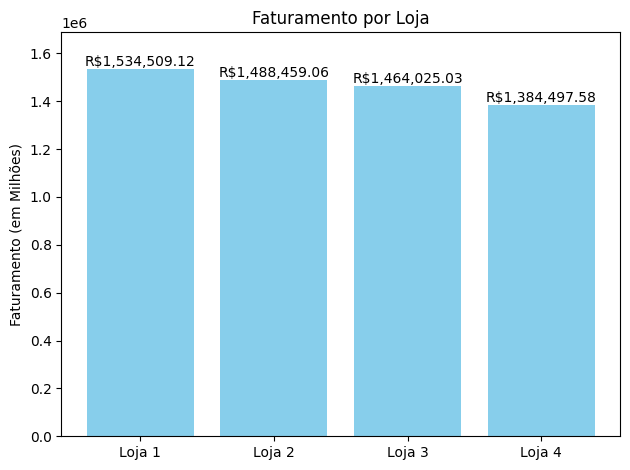

In [5]:
fig, ax = plt.subplots()
barras = ax.bar(nome_lojas, faturamento, color='skyblue')

# Adiciona os valores no topo de cada barra
for barra in barras:
    valor = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        valor,
        f'R${valor:,.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Formata o eixo Y com separador de milhar
ax.set_ylabel('Faturamento (em Milhões)')
ax.set_title('Faturamento por Loja')
ax.set_ylim(0, max(faturamento) * 1.1)  # Dá uma folga acima das barras

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [8]:
categorias_vendas = []
categorias = []
vendas = []
def vendas_categoria1(ordem = 'desc'):
  for loja in lojas:
    categorias_vendas.append(loja['Categoria do Produto'].value_counts(sort=True, ascending=(ordem == 'asc')).to_dict())
  return categorias_vendas
vendas_categoria1()


[{'moveis': 465,
  'eletronicos': 448,
  'brinquedos': 324,
  'eletrodomesticos': 312,
  'esporte e lazer': 284,
  'instrumentos musicais': 182,
  'livros': 173,
  'utilidades domesticas': 171},
 {'moveis': 442,
  'eletronicos': 422,
  'brinquedos': 313,
  'eletrodomesticos': 305,
  'esporte e lazer': 275,
  'instrumentos musicais': 224,
  'livros': 197,
  'utilidades domesticas': 181},
 {'moveis': 499,
  'eletronicos': 451,
  'brinquedos': 315,
  'eletrodomesticos': 278,
  'esporte e lazer': 277,
  'livros': 185,
  'instrumentos musicais': 177,
  'utilidades domesticas': 177},
 {'moveis': 480,
  'eletronicos': 451,
  'brinquedos': 338,
  'esporte e lazer': 277,
  'eletrodomesticos': 254,
  'utilidades domesticas': 201,
  'livros': 187,
  'instrumentos musicais': 170}]

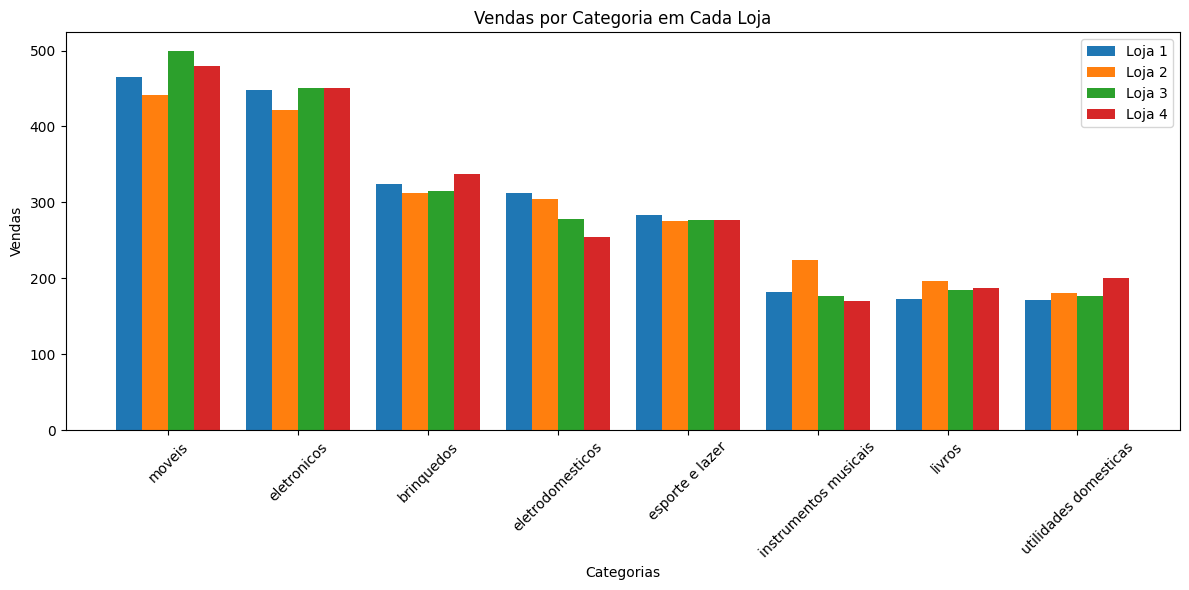

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Todas as categorias (na mesma ordem para todas as lojas)
todas_categorias = list(categorias_vendas[0].keys())

# Número de lojas e categorias
num_lojas = len(categorias_vendas)
num_categorias = len(todas_categorias)

# Posições das barras
x = np.arange(num_categorias)
largura = 0.2  # Largura das barras

# Criar a figura
plt.figure(figsize=(12, 6))

# Plotar cada loja com deslocamento
for i in range(num_lojas):
    valores = [categorias_vendas[i].get(cat, 0) for cat in todas_categorias]
    plt.bar(x + i * largura, valores, width=largura, label=nome_lojas[i])

# Configurações do gráfico
plt.xlabel('Categorias')
plt.ylabel('Vendas')
plt.title('Vendas por Categoria em Cada Loja')
plt.xticks(x + largura * (num_lojas - 1) / 2, todas_categorias, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [10]:
avg_avaliacao = []
total_avaliacao = []
percent_avaliacao = []

notas = [5, 4, 3, 2, 1]
# def status_avaliacao():
#   for loja in range(len(lojas)):
#     avg_avaliacao.append(round(lojas[loja]['Avaliação da compra'].mean(), 2))
#     total_avaliacao.append(lojas[loja]['Avaliação da compra'].value_counts())
#     percent_avaliacao.append(lojas[loja]['Avaliação da compra'].value_counts(normalize=True))

#   return avg_avaliacao, total_avaliacao, percent_avaliacao

def status_avaliacao():
    for loja in lojas:
        # Média
        avg = round(loja['Avaliação da compra'].mean(), 2)
        avg_avaliacao.append(avg)

        # Total por nota
        total = loja['Avaliação da compra'].value_counts().reindex(notas, fill_value=0)
        total_avaliacao.append(total.to_dict())

        # Percentual por nota
        percent = loja['Avaliação da compra'].value_counts(normalize=True).reindex(notas, fill_value=0)
        percent_avaliacao.append((percent * 100).to_dict())

    return avg_avaliacao, total_avaliacao, percent_avaliacao

status_avaliacao()

([3.98, 4.04, 4.05, 4.0],
 [{5: 1292, 4: 444, 3: 218, 2: 86, 1: 319},
  {5: 1302, 4: 482, 3: 209, 2: 93, 1: 273},
  {5: 1356, 4: 434, 3: 193, 2: 79, 1: 297},
  {5: 1300, 4: 453, 3: 210, 2: 85, 1: 310}],
 [{5: 54.76896990250106,
   4: 18.821534548537517,
   3: 9.24120389995761,
   2: 3.6456125476896992,
   1: 13.522679101314116},
  {5: 55.19287833827893,
   4: 20.43238660449343,
   3: 8.859686307757524,
   2: 3.9423484527342096,
   1: 11.572700296735905},
  {5: 57.48198389147944,
   4: 18.397626112759642,
   3: 8.181432810512929,
   2: 3.3488766426451884,
   1: 12.590080542602797},
  {5: 55.13146734520781,
   4: 19.21119592875318,
   3: 8.9058524173028,
   2: 3.604749787955895,
   1: 13.146734520780324}])

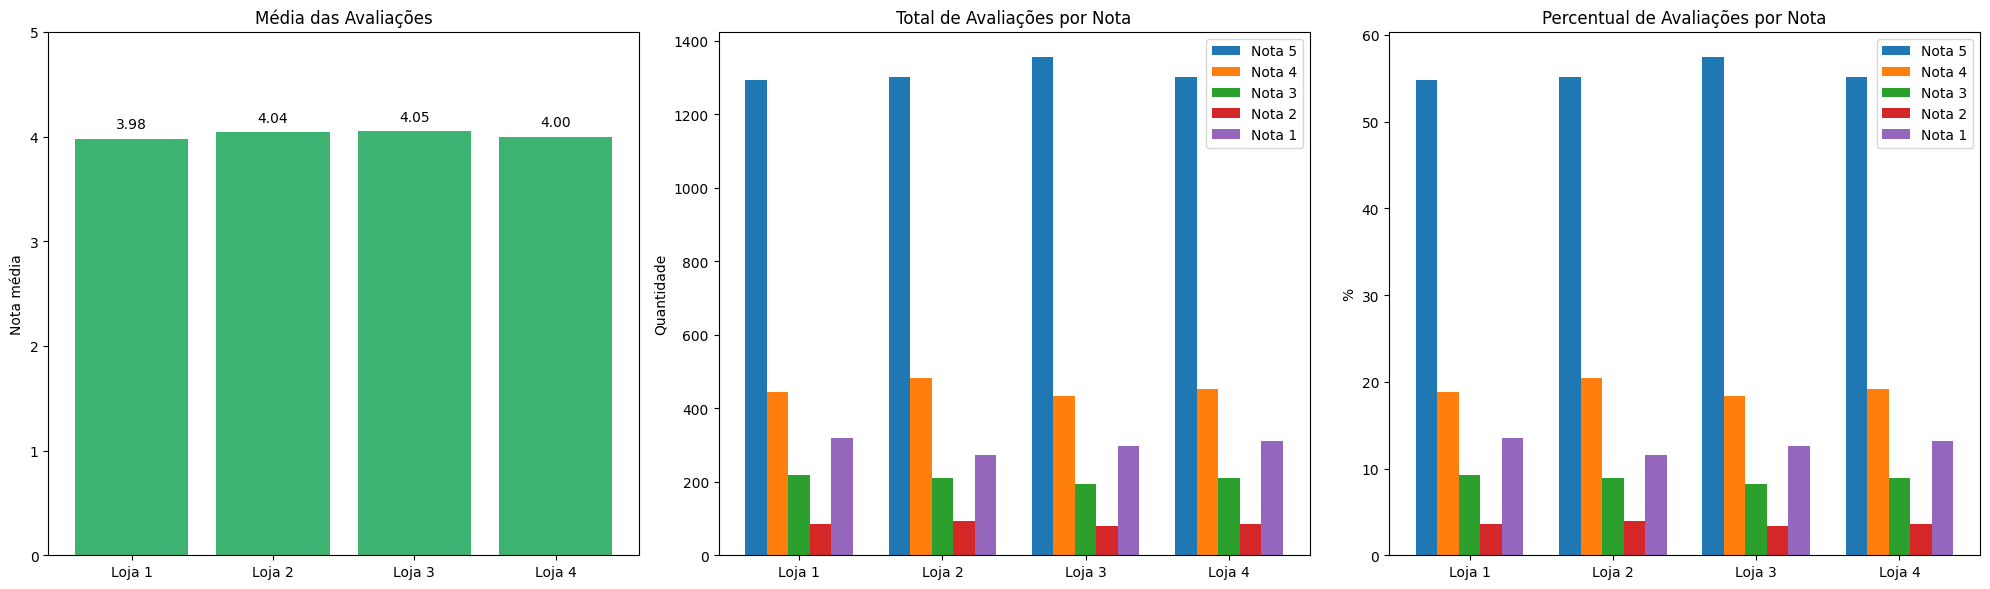

In [11]:
import matplotlib.pyplot as plt
import numpy as np

notas = [5, 4, 3, 2, 1]  # ordem das notas para consistência
x = np.arange(len(nome_lojas))  # [0, 1, 2, 3]
width = 0.15  # largura das barras

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Gráfico 1: Média das avaliações
axs[0].bar(nome_lojas, avg_avaliacao, color='mediumseagreen')
axs[0].set_title('Média das Avaliações')
axs[0].set_ylim(0, 5)
axs[0].set_ylabel('Nota média')
for i, valor in enumerate(avg_avaliacao):
    axs[0].text(i, valor + 0.1, f'{valor:.2f}', ha='center')

# Gráfico 2: Total de avaliações por nota
for i, nota in enumerate(notas):
    valores = [loja[nota] for loja in total_avaliacao]
    axs[1].bar(x + i * width, valores, width, label=f'Nota {nota}')
axs[1].set_title('Total de Avaliações por Nota')
axs[1].set_xticks(x + width * 2)
axs[1].set_xticklabels(nome_lojas)
axs[1].set_ylabel('Quantidade')
axs[1].legend()

# Gráfico 3: Porcentagem de avaliações por nota
for i, nota in enumerate(notas):
    valores = [loja[nota] for loja in percent_avaliacao]
    axs[2].bar(x + i * width, valores, width, label=f'Nota {nota}')
axs[2].set_title('Percentual de Avaliações por Nota')
axs[2].set_xticks(x + width * 2)
axs[2].set_xticklabels(nome_lojas)
axs[2].set_ylabel('%')
axs[2].legend()

plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [48]:
vendas = []
all_vendas = []
def all_vendas_produto(ordem='desc'): # Todos os produtos
  for loja in lojas:
      all_vendas.append(loja['Produto'].value_counts(sort=True, ascending=(ordem == 'asc')).to_dict())
  return all_vendas

def vendas_produto(ordem='desc'): # Top 5 produtos
    vendas = []
    for loja in lojas:
        contagem = loja['Produto'].value_counts(sort=True, ascending=(ordem == 'asc'))
        top5 = contagem.head(5).to_dict()
        vendas.append(top5)
    return vendas

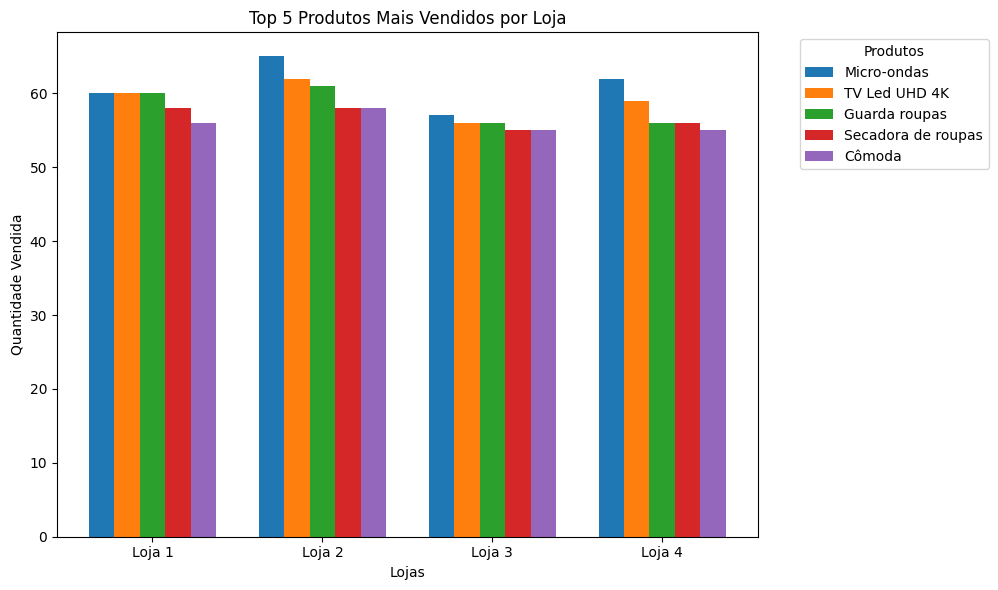

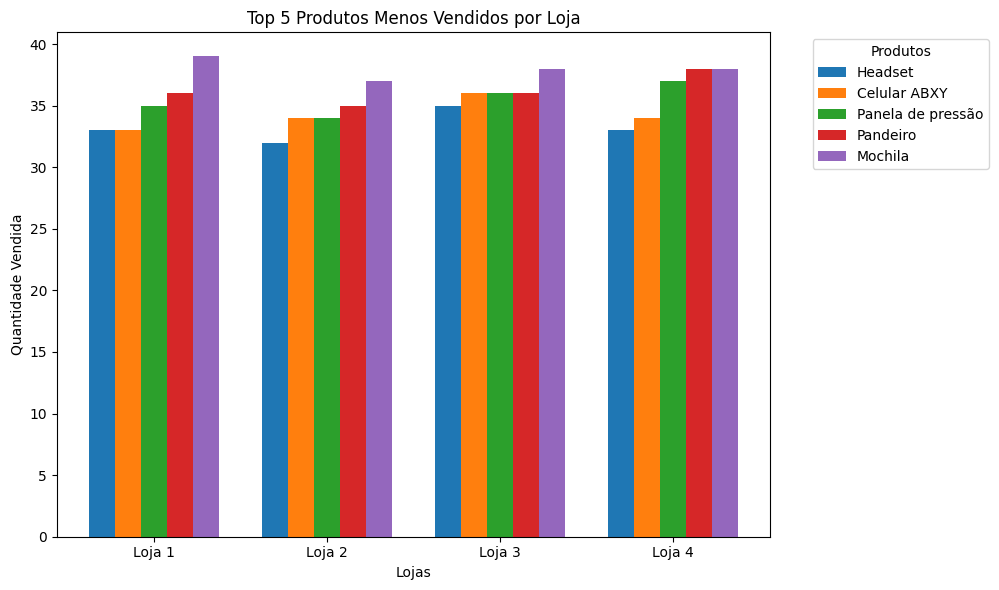

In [46]:
def plot_top_produtos(vendas, top_n=5, titulo='Produtos Mais Vendidos'):
    loja_labels = [f'Loja {i+1}' for i in range(len(vendas))]
    produtos_por_loja = []

    for loja_vendas in vendas:
        produtos = list(loja_vendas.keys())
        quantidades = list(loja_vendas.values())
        produtos_por_loja.append((produtos, quantidades))

    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(lojas))  # Posição de cada loja
    largura = 0.15

    for i in range(top_n):
        quantidades = []
        nomes_produtos = []
        for produtos, qtds in produtos_por_loja:
            if i < len(produtos):
                quantidades.append(qtds[i])
                nomes_produtos.append(produtos[i])
            else:
                quantidades.append(0)
                nomes_produtos.append(None)

        nomes_unicos = list(dict.fromkeys([p for p in nomes_produtos if p]))  # Só produtos válidos
        label = nomes_unicos[0] if nomes_unicos else f'Produto {i+1}'

        deslocamento = x + (i - top_n/2) * largura + largura/2
        ax.bar(deslocamento, quantidades, width=largura, label=label)

    ax.set_xlabel('Lojas')
    ax.set_ylabel('Quantidade Vendida')
    ax.set_title(titulo)
    ax.set_xticks(x)
    ax.set_xticklabels(loja_labels)

    # Legenda organizada
    ax.legend(title="Produtos", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

# Gerar os gráficos
vendas_mais = vendas_produto(ordem='desc')
plot_top_produtos(vendas_mais, top_n=5, titulo='Top 5 Produtos Mais Vendidos por Loja')

vendas_menos = vendas_produto(ordem='asc')
plot_top_produtos(vendas_menos, top_n=5, titulo='Top 5 Produtos Menos Vendidos por Loja')

# 5. Frete Médio por Loja


In [49]:
# def frete_medio():
#   for loja in range(len(lojas)):
#     print(f"Frete médio da loja {loja}: ${round(lojas[loja]['Frete'].sum()/len(lojas[loja]['Frete']), 2)}")

# frete_medio()

fretes = []
def frete_medio():
    for loja in lojas:
        frete_medio_loja = round(loja['Frete'].mean(), 2)
        fretes.append(frete_medio_loja)
    return fretes

frete_medio()

[34.69, 33.62, 33.07, 31.28]

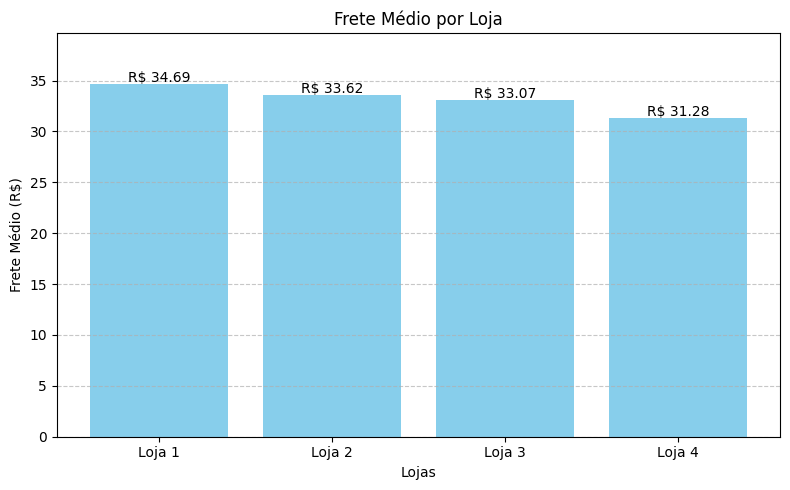

In [50]:
plt.figure(figsize=(8, 5))
plt.bar(nomes_lojas, fretes, color='skyblue')
plt.title('Frete Médio por Loja')
plt.xlabel('Lojas')
plt.ylabel('Frete Médio (R$)')
plt.ylim(0, max(fretes) + 5)  # Ajuste no limite superior do eixo Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, valor in enumerate(fretes):
    plt.text(i, valor + 0.2, f'R$ {valor}', ha='center')

plt.tight_layout()
plt.show()